<a href="https://colab.research.google.com/github/balaajhi/One-step-at-a-time/blob/main/Simple_Moving_Average_AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%pip install yfinance


Using Yahoo finance to retrive data

In [ ]:
import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]
start = dt.datetime.today()-dt.timedelta(6000)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

# looping over tickers and creating a dataframe with close prices
for ticker in stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in stocks:
    ohlcv_data[ticker] = yf.download(ticker,start,end)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df = cl_price.iloc[: , :1]
df

,AMZN
Date,
2005-08-26,42.369999
2005-08-29,42.790001
2005-08-30,42.490002
2005-08-31,42.700001
2005-09-01,41.840000
...,...
2022-01-24,2890.879883
2022-01-25,2799.719971
2022-01-26,2777.449951


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4135 entries, 2005-08-26 to 2022-01-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    4135 non-null   float64
dtypes: float64(1)
memory usage: 64.6 KB


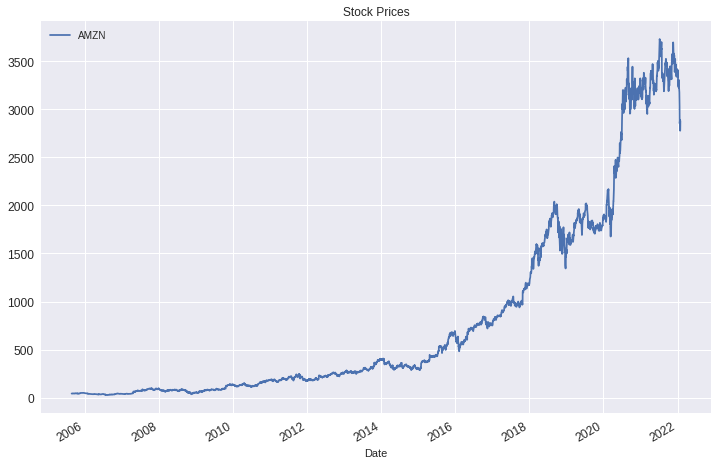

In [ ]:
df.plot(figsize = (12, 8), title = "Stock Prices", fontsize = 12)
plt.show()

In [ ]:
df["returns"] = np.log(df.div(df.shift(1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns
Date,,
2005-08-26,42.369999,NaN
2005-08-29,42.790001,0.009864
2005-08-30,42.490002,-0.007036
2005-08-31,42.700001,0.004930
2005-09-01,41.840000,-0.020346
...,...,...
2022-01-24,2890.879883,0.013239
2022-01-25,2799.719971,-0.032042
2022-01-26,2777.449951,-0.007986


## A simple Buy and Hold "Strategy"

In [ ]:
df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns
Date,,
2005-08-29,42.790001,0.009864
2005-08-30,42.490002,-0.007036
2005-08-31,42.700001,0.004930
2005-09-01,41.840000,-0.020346
2005-09-02,41.509998,-0.007919
...,...,...
2022-01-24,2890.879883,0.013239
2022-01-25,2799.719971,-0.032042
2022-01-26,2777.449951,-0.007986


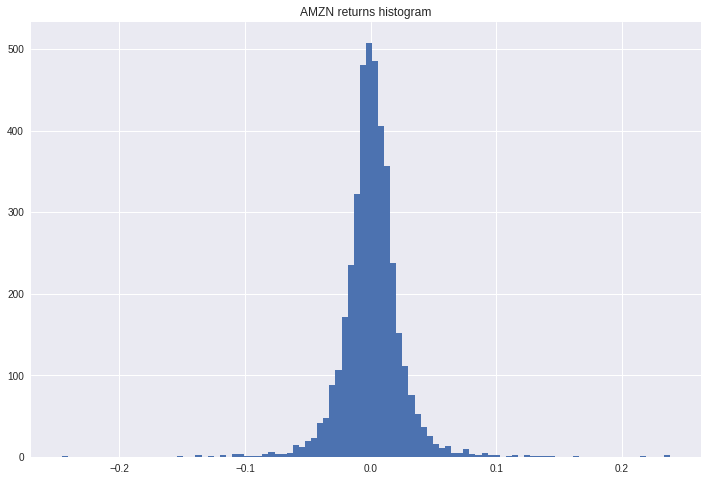

In [ ]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("AMZN returns histogram")
plt.show()

In [ ]:
df.returns.sum()

4.218952264599434

In [ ]:
np.exp(df.returns.sum())

67.96224052832838

In [ ]:
df.AMZN[-1] / df.AMZN[0]

67.29516235062371

In [ ]:
df.returns.cumsum().apply(np.exp)

Date
2005-08-29     1.009913
2005-08-30     1.002832
2005-08-31     1.007789
2005-09-01     0.987491
2005-09-02     0.979703
                ...    
2022-01-24    68.229407
2022-01-25    66.077886
2022-01-26    65.552278
2022-01-27    65.913384
2022-01-28    67.962241
Name: returns, Length: 4134, dtype: float64

In [ ]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns,creturns
Date,,,
2005-08-29,42.790001,0.009864,1.009913
2005-08-30,42.490002,-0.007036,1.002832
2005-08-31,42.700001,0.004930,1.007789
2005-09-01,41.840000,-0.020346,0.987491
2005-09-02,41.509998,-0.007919,0.979703
...,...,...,...
2022-01-24,2890.879883,0.013239,68.229407
2022-01-25,2799.719971,-0.032042,66.077886
2022-01-26,2777.449951,-0.007986,65.552278


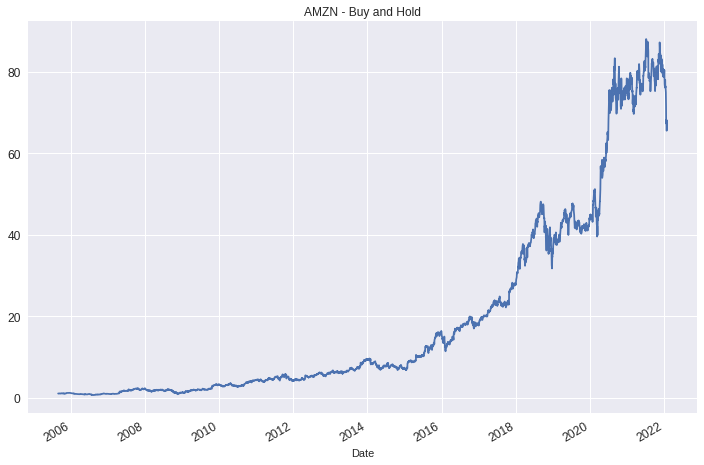

In [ ]:
df.creturns.plot(figsize = (12, 8), title = "AMZN - Buy and Hold", fontsize = 12)
plt.show()

#Performance Metrics

In [ ]:
df

,AMZN,returns,creturns
Date,,,
2005-08-29,42.790001,0.009864,1.009913
2005-08-30,42.490002,-0.007036,1.002832
2005-08-31,42.700001,0.004930,1.007789
2005-09-01,41.840000,-0.020346,0.987491
2005-09-02,41.509998,-0.007919,0.979703
...,...,...,...
2022-01-24,2890.879883,0.013239,68.229407
2022-01-25,2799.719971,-0.032042,66.077886
2022-01-26,2777.449951,-0.007986,65.552278


In [ ]:
df.creturns.iloc[-1] # absolute Performance 

67.96224052832873

In [ ]:
df.returns.sum() # absolute Performance

4.218952264599434

In [ ]:
df.describe()

,AMZN,returns,creturns
count,4134.000000,4134.000000,4134.000000
mean,810.576371,0.001021,19.130904
std,1006.812352,0.023663,23.762388
min,26.070000,-0.246182,0.615294
25%,94.717501,-0.009548,2.235485
50%,305.059998,0.000756,7.199906
75%,1181.480011,0.012143,27.884825
max,3731.409912,0.238621,88.067265


**annualized mean return and risk**

In [ ]:
df.returns.mean() * 252 # mean return

0.2571785125009818

In [ ]:
df.returns.std() * np.sqrt(252) # risk

0.3756352378288665

**maximum drawdown**

In [ ]:
df["cummax"] = df.creturns.cummax()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,returns,creturns,cummax
Date,,,,
2005-08-29,42.790001,0.009864,1.009913,1.009913
2005-08-30,42.490002,-0.007036,1.002832,1.009913
2005-08-31,42.700001,0.004930,1.007789,1.009913
2005-09-01,41.840000,-0.020346,0.987491,1.009913
2005-09-02,41.509998,-0.007919,0.979703,1.009913
...,...,...,...,...
2022-01-24,2890.879883,0.013239,68.229407,88.067265
2022-01-25,2799.719971,-0.032042,66.077886,88.067265
2022-01-26,2777.449951,-0.007986,65.552278,88.067265


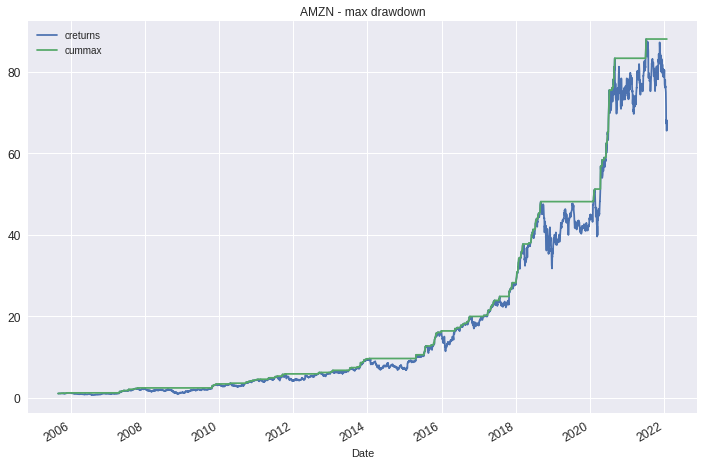

In [ ]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "AMZN - max drawdown", fontsize = 12)
plt.show()

In [ ]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2005-08-29     0.000000
2005-08-30     0.007080
2005-08-31     0.002124
2005-09-01     0.022422
2005-09-02     0.030210
                ...    
2022-01-24    19.837858
2022-01-25    21.989378
2022-01-26    22.514987
2022-01-27    22.153881
2022-01-28    20.105024
Length: 4134, dtype: float64

In [ ]:
drawdown.max() # maximum drawdown

22.514986664765274

In [ ]:
drawdown.idxmax()

Timestamp('2022-01-26 00:00:00')

#Simple Moving Average


In [ ]:
df = cl_price.iloc[: , :1]
df

,AMZN
Date,
2005-08-26,42.369999
2005-08-29,42.790001
2005-08-30,42.490002
2005-08-31,42.700001
2005-09-01,41.840000
...,...
2022-01-24,2890.879883
2022-01-25,2799.719971
2022-01-26,2777.449951


In [ ]:
sma_s = 50
sma_l = 200

In [ ]:
df.AMZN.rolling(50).mean().tail()

Date
2022-01-24    3388.855215
2022-01-25    3375.399614
2022-01-26    3360.445615
2022-01-27    3345.387017
2022-01-28    3332.164219
Name: AMZN, dtype: float64

In [ ]:
df["SMA_S"] = df.AMZN.rolling(sma_s).mean()
df["SMA_L"] = df.AMZN.rolling(sma_l).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,AMZN,SMA_S,SMA_L
Date,,,
2005-08-26,42.369999,NaN,NaN
2005-08-29,42.790001,NaN,NaN
2005-08-30,42.490002,NaN,NaN
2005-08-31,42.700001,NaN,NaN
2005-09-01,41.840000,NaN,NaN
...,...,...,...
2022-01-24,2890.879883,3388.855215,3388.293704
2022-01-25,2799.719971,3375.399614,3385.395354
2022-01-26,2777.449951,3360.445615,3382.282604


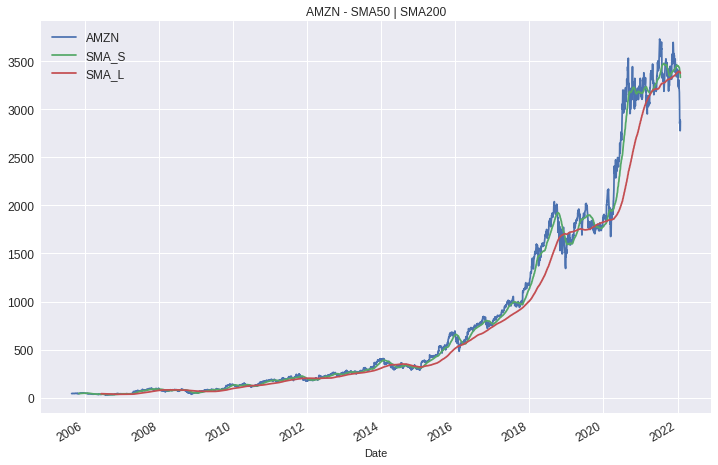

In [ ]:
df.plot(figsize = (12, 8), title = "AMZN - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,AMZN,SMA_S,SMA_L
Date,,,
2006-06-13,33.470001,34.917600,40.892650
2006-06-14,33.680000,34.868400,40.849200
2006-06-15,34.959999,34.832200,40.810050
2006-06-16,35.090000,34.787200,40.773050
2006-06-19,35.070000,34.718400,40.734900
...,...,...,...
2022-01-24,2890.879883,3388.855215,3388.293704
2022-01-25,2799.719971,3375.399614,3385.395354
2022-01-26,2777.449951,3360.445615,3382.282604


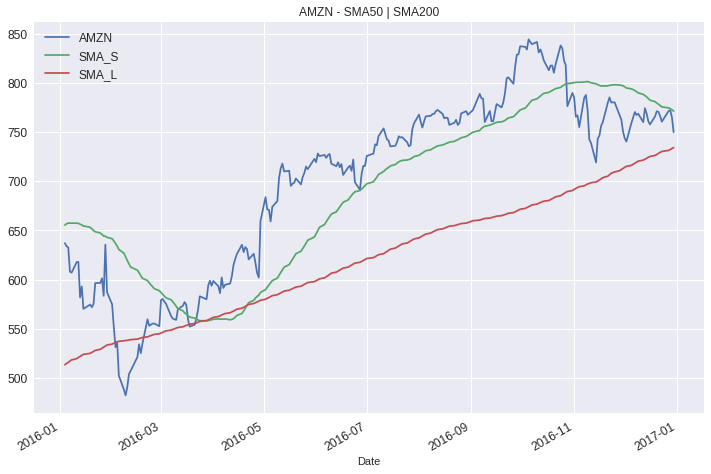

In [ ]:
df.loc["2016"].plot(figsize = (12, 8), title = "AMZN - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
df["position"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1 )
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AMZN,SMA_S,SMA_L,position
Date,,,,
2006-06-13,33.470001,34.917600,40.892650,-1
2006-06-14,33.680000,34.868400,40.849200,-1
2006-06-15,34.959999,34.832200,40.810050,-1
2006-06-16,35.090000,34.787200,40.773050,-1
2006-06-19,35.070000,34.718400,40.734900,-1
...,...,...,...,...
2022-01-24,2890.879883,3388.855215,3388.293704,1
2022-01-25,2799.719971,3375.399614,3385.395354,-1
2022-01-26,2777.449951,3360.445615,3382.282604,-1


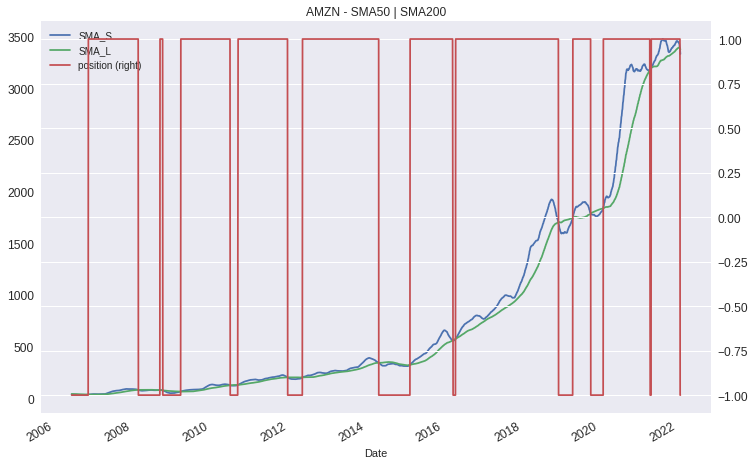

In [ ]:
df.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "AMZN - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

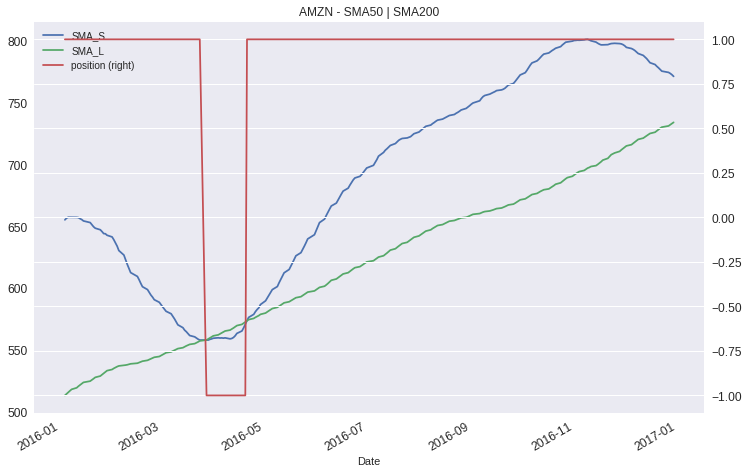

In [ ]:
df.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "AMZN - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

**Quantifying the returns**

In [ ]:
df

,AMZN,SMA_S,SMA_L,position
Date,,,,
2006-06-13,33.470001,34.917600,40.892650,-1
2006-06-14,33.680000,34.868400,40.849200,-1
2006-06-15,34.959999,34.832200,40.810050,-1
2006-06-16,35.090000,34.787200,40.773050,-1
2006-06-19,35.070000,34.718400,40.734900,-1
...,...,...,...,...
2022-01-24,2890.879883,3388.855215,3388.293704,1
2022-01-25,2799.719971,3375.399614,3385.395354,-1
2022-01-26,2777.449951,3360.445615,3382.282604,-1


In [ ]:
df["returns"] = np.log(df.AMZN.div(df.AMZN.shift(1)))
df["strategy"] = df.position.shift(1) * df["returns"]
df.dropna(inplace = True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,AMZN,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2006-06-14,33.680000,34.868400,40.849200,-1,0.006255,-0.006255
2006-06-15,34.959999,34.832200,40.810050,-1,0.037300,-0.037300
2006-06-16,35.090000,34.787200,40.773050,-1,0.003712,-0.003712
2006-06-19,35.070000,34.718400,40.734900,-1,-0.000570,0.000570
2006-06-20,35.480000,34.686200,40.703100,-1,0.011623,-0.011623
...,...,...,...,...,...,...
2022-01-24,2890.879883,3388.855215,3388.293704,1,0.013239,0.013239
2022-01-25,2799.719971,3375.399614,3385.395354,-1,-0.032042,-0.032042
2022-01-26,2777.449951,3360.445615,3382.282604,-1,-0.007986,0.007986


In [ ]:
df[["returns", "strategy"]].sum() # absolute performance

returns     4.454743
strategy    0.830261
dtype: float64

In [ ]:
df[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     86.034059
strategy     2.293917
dtype: float64

In [ ]:
df[["returns", "strategy"]].mean() * 252 # annualized return

returns     0.285285
strategy    0.053170
dtype: float64

In [ ]:
df[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.377647
strategy    0.378060
dtype: float64

In [ ]:
df["creturns"] = df["returns"].cumsum().apply(np.exp)
df["cstrategy"] = df["strategy"].cumsum().apply(np.exp)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AMZN,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2006-06-14,33.680000,34.868400,40.849200,-1,0.006255,-0.006255,1.006274,0.993765
2006-06-15,34.959999,34.832200,40.810050,-1,0.037300,-0.037300,1.044517,0.957380
2006-06-16,35.090000,34.787200,40.773050,-1,0.003712,-0.003712,1.048402,0.953833
2006-06-19,35.070000,34.718400,40.734900,-1,-0.000570,0.000570,1.047804,0.954377
2006-06-20,35.480000,34.686200,40.703100,-1,0.011623,-0.011623,1.060054,0.943348
...,...,...,...,...,...,...,...,...
2022-01-24,2890.879883,3388.855215,3388.293704,1,0.013239,0.013239,86.372267,2.436154
2022-01-25,2799.719971,3375.399614,3385.395354,-1,-0.032042,-0.032042,83.648637,2.359333
2022-01-26,2777.449951,3360.445615,3382.282604,-1,-0.007986,0.007986,82.983264,2.378250


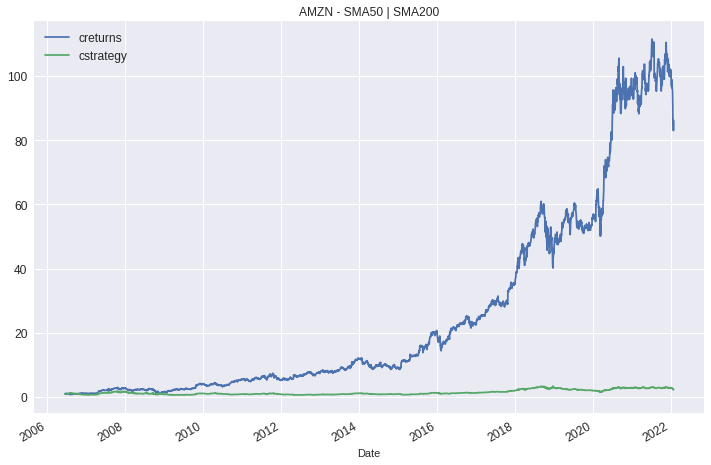

In [ ]:
df[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "AMZN - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
outperf = df.cstrategy.iloc[-1] - df.creturns.iloc[-1]
outperf

-83.74014213473127